Digital audio basics
Audio representation in computers

In [1]:
# import libraries for manipulating arrays and plotting graphs
import numpy as np
import matplotlib.pyplot as plt

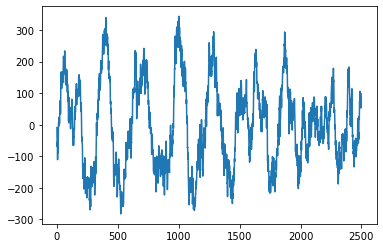

In [5]:
%matplotlib inline
import scipy.io.wavfile as wf

sr_a, a = wf.read('../audio_files/ah.wav')
plt.plot( np.arange( a[5000:7500, 0].size ) , a[5000:7500, 0] )

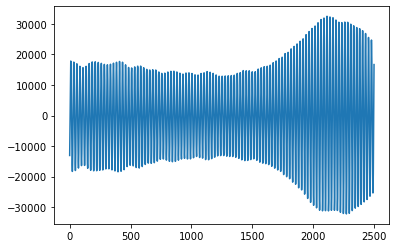

In [6]:
sr_w, w = wf.read('../audio_files/whistling.wav')
plt.plot( np.arange( w[5000:7500, 0].size ) , w[5000:7500, 0] )

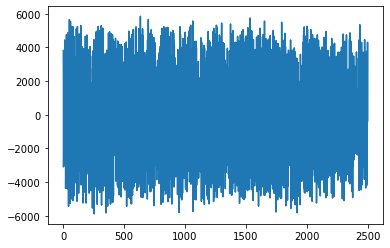

In [7]:
sr_w, w = wf.read('../audio_files/noise.wav')
plt.plot( np.arange( w[5000:7500, 0].size ) , w[5000:7500, 0] )

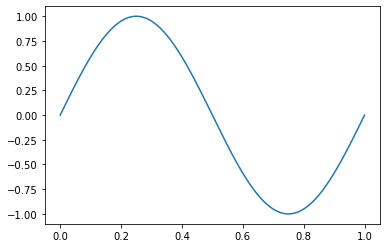

In [5]:
# initialise 'time' array
t = np.arange(44100)/44100
# make a sinusoidal
s = np.sin( 2*np.pi*t )
# plot it
plt.plot( t, s )

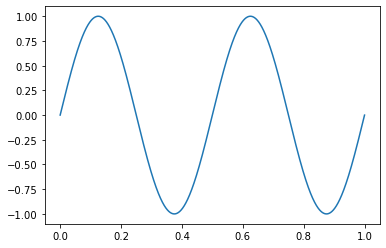

In [6]:
# change frequency, e.g. 2
# set frequency
f = 2
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# and plot it
plt.plot( t, s )

In [7]:
# let's listen to some audio
import sounddevice as sd
# set frequency
f = 440
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# and play it
sd.play( s , 44100 )

In [8]:
# we can also make a wav file out of it
import scipy.io.wavfile as wf
wf.write('test1.wav', 44100, s)
# todo: write in a folder to keep things clean
# also: open saved wav file in Audacity to check it out - both in time and frequency domains

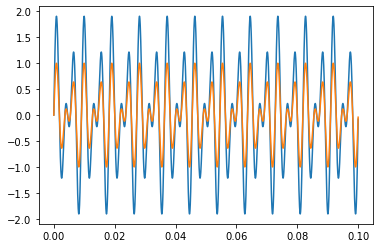

In [9]:
# add harmonics
f1 = 220
f2 = (3/2)*220
s1 = np.sin( 2*np.pi*f1*t )
s2 = np.sin( 2*np.pi*f2*t )
# plot them as they would sound together, i.e., plot sum
s = s1 + s2
# for clarity, plot the first 1/10 of a second
plt.plot( t[:4410] , s[:4410] )
# normalise to avoid excessive range
s /= np.max( np.abs(s) )
plt.plot( t[:4410] , s[:4410] )
sd.play( s , 44100 )

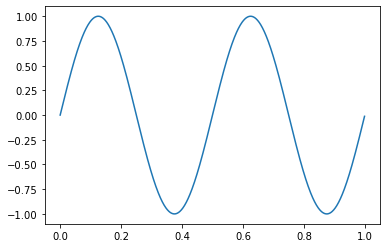

In [10]:
# Sampling rate - aliasing - sampling (Nyquist) theorem
# assume a sample rate of 1000, i.e. sampling 1000 times per second
sr = 1000
# construct a 1-sec time array that corresponds to this sample rate
t = np.arange(sr)/sr # question: how can we represent 2 seconds of audio? 2.3 secs?
# let's construct an audio array of one second with frequency 2
f = 2
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )

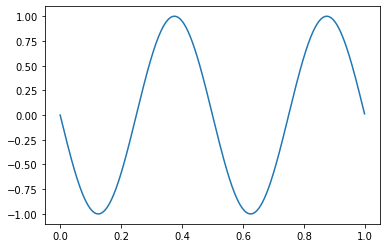

In [11]:
# now let's construct an audio array of one second with frequency 998
f = 998
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )
# what's going on?

<IPython.core.display.Javascript object>


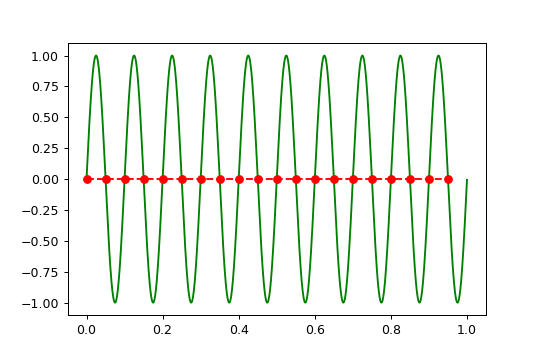

interactive(children=(IntSlider(value=10, description='f', max=50), Output()), _dom_classes=('widget-interact'…

<function __main__.change_freq(f=2)>

In [20]:
# see the following link to activate the interactive environment:
# https://ipywidgets.readthedocs.io/en/latest/user_install.html
# if using conda, make sure last version of matplolib is installed in conda
# conda install matplotlib
# conda update matplolib
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# assume an the approximation of an analog signal, using higher sample rate
analog_sr = 10000
# assume 1 second of an 'analog' recording
analog_t = np.arange( analog_sr )/analog_sr
# with frequency 50
f_real = 2
analog_s = np.sin( 2*np.pi*f_real*analog_t )
# plot it
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_analog, = ax.plot( analog_t , analog_s, 'g' )
# assume that we are sampling at 100
digital_sr = 20
digital_t = np.arange( digital_sr )/digital_sr
# from analog_s, sample
digital_idxs = np.floor( digital_t*analog_sr ).astype(int)
digital_s = analog_s[ digital_idxs ]
line_digital, = ax.plot( digital_t , digital_s, 'ro--' )
# plt.savefig('aliasing.png', dpi=300)

def change_freq(f=2):
    analog_s = np.sin( 2*np.pi*f*analog_t )
    line_analog.set_ydata( analog_s )
    digital_s = analog_s[ digital_idxs ]
    line_digital.set_ydata( digital_s )
    # fig.canvas.draw()
    fig.show()
    return f

# w = widgets.IntSlider(min=0, max=50, step=1, value=10)
# display(w)
interact(change_freq, f=widgets.IntSlider(min=0, max=50, step=1, value=10))

<IPython.core.display.Javascript object>


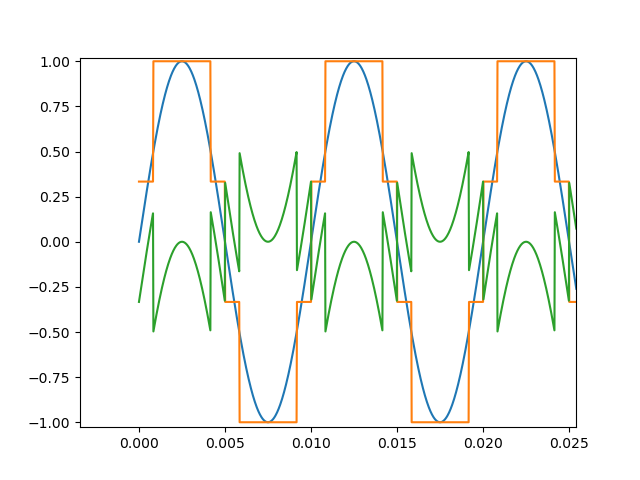

In [7]:
import time
# but the values of the audio samples per se are also digital
# the available values are defined by bitrate
sr = 44100
t = np.arange( sr )/sr
# set frequency
f = 100
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
fig = plt.figure()
plt.plot( t , s )
# assume 2-bit audio: 00, 01, 10, 11
s_2bit = np.floor( np.interp( s, (-1, 1), (0, 4) ) )
s_2bit[ s_2bit >= 4 ] = 3
s_2bit = np.interp( s_2bit, (0, 3), (-1, 1) )
plt.plot( t , s_2bit )
quant_noise = s - s_2bit
plt.plot( t , quant_noise )
# np.iinfo(np.int16).min

sd.play( s , sr )
time.sleep(1.5)
sd.play( s_2bit , sr )
time.sleep(1.5)
sd.play( quant_noise , sr )

<IPython.core.display.Javascript object>


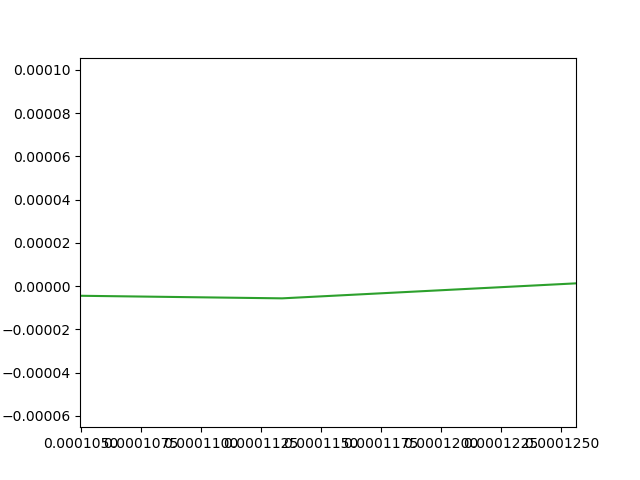

<IPython.core.display.Javascript object>

In [17]:
# assume n-bit audio
# set frequency
f = 100
bits_n = 16
s_nbit = np.floor( np.interp( s, (-1, 1), (0, 2**bits_n) ) )
s_nbit[ s_nbit >= 2**bits_n ] = (2**bits_n)-1
s_nbit = np.interp( s_nbit, (0, (2**bits_n)-1), (-1, 1) )
plt.plot( t , s_nbit )
quant_noise = s - s_nbit
plt.plot( t , quant_noise )
# np.iinfo(np.int16).min

fig = plt.figure()
plt.plot( t[:4410] , s[:4410] )
plt.plot( t[:4410] , s_nbit[:4410] )
plt.plot( t[:4410] , quant_noise[:4410] )
plt.show()

# just for running next cell
from IPython.display import Javascript
Javascript("var output_area = this; var cell_element = output_area.element.parents('.cell'); var cell_idx = Jupyter.notebook.get_cell_elements().index(cell_element); Jupyter.notebook.execute_cells([cell_idx+1]);")

In [18]:
sd.play( s , sr )
time.sleep(1.5)
sd.play( s_nbit , sr )
time.sleep(1.5)
sd.play( quant_noise , sr )

<IPython.core.display.Javascript object>


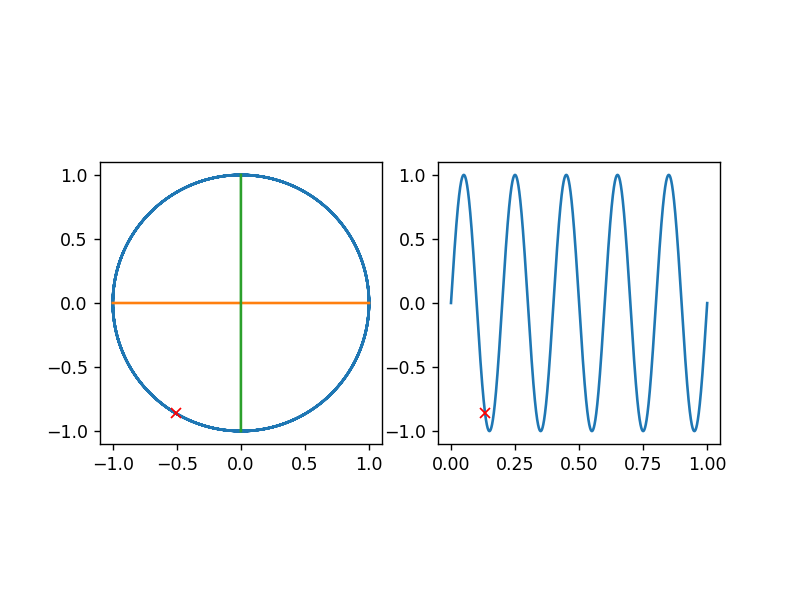

interactive(children=(FloatSlider(value=0.0, description='t_v', max=1.0, step=0.001), Output()), _dom_classes=…

<function __main__.change_time_value(t_v=0.0)>

In [2]:
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sr = 44100
t = np.arange( sr )/sr
t_value = 0.0
# set frequency
f = 5
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# plot sinusoidal in phase and time space
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal', adjustable='box')
plt.plot( np.cos( 2*np.pi*f*t ) , s )
plt.plot( 1-2*t , np.zeros( t.size ) )
plt.plot( np.zeros( t.size ) , 1-2*t )
# plt.plot( np.cos( 2*np.pi*f*t_value ) , np.sin( 2*np.pi*f*t_value ) , 'rx' )
unit_plot, = ax1.plot( np.cos( 2*np.pi*f*t_value ) , np.sin( 2*np.pi*f*t_value ) , 'rx' )
ax2 = fig.add_subplot(122)
plt.plot( t , s )
# plt.plot( t_value , np.sin( 2*np.pi*f*t_value ) , 'rx' )
time_plot, = ax2.plot( t_value , np.sin( 2*np.pi*f*t_value ) , 'rx' )
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')

def change_time_value(t_v=0.0):
    unit_plot.set_ydata( np.sin( 2*np.pi*f*t_v ) )
    unit_plot.set_xdata( np.cos( 2*np.pi*f*t_v ) )
    time_plot.set_ydata( np.sin( 2*np.pi*f*t_v ) )
    time_plot.set_xdata( np.sin( t_v ) )
    print('t_value 1 : ' + str(t_v))
    # fig.canvas.draw()
    fig.show()
    return t_v

# w = widgets.IntSlider(min=0, max=50, step=1, value=10)
# display(w)
interact(change_time_value, t_v=widgets.FloatSlider(min=0.0, max=1.0, step=0.001, value=0.0))